In [1]:
# Importing essential libraries for data manipulation, statistical analysis, and visualization
import pandas as pd  # For handling and manipulating data
import numpy as np  # For numerical operations
from scipy import stats  # For statistical tests
import statsmodels.api as sm  # For statistical modeling
import matplotlib.pyplot as plt  # For creating plots
import seaborn as sns  # For data visualization, built on top of matplotlib

# Parameters & Descriptive Statistics

In [2]:
# Loading the 'penguins' dataset available in seaborn library
panguins_data = sns.load_dataset("penguins")

# Displaying the first 5 rows of the dataset
panguins_data.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [3]:
# Dropping missing values to avoid issues during analysis
panguins_data.dropna(inplace=True)

In [4]:
# Descriptive statistics for the dataset's numerical columns
panguins_data.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,333.000000,333.000000,333.000000,333.000000
mean,43.992793,17.164865,200.966967,4207.057057
std,5.468668,1.969235,14.015765,805.215802
min,32.100000,13.100000,172.000000,2700.000000
25%,39.500000,15.600000,190.000000,3550.000000
50%,44.500000,17.300000,197.000000,4050.000000
75%,48.600000,18.700000,213.000000,4775.000000
max,59.600000,21.500000,231.000000,6300.000000


In [5]:
# Calculating the size of the dataset (number of observations)
n = len(panguins_data)
print("The Data Size is:", n)

The Data Size is: 333


## Calculation of the parameters of the Bill length Variable (Manual & Built-in)

### The mean

In [6]:
# Calculating the mean of 'bill_length_mm' using the formula: sum(values) / n
bill_length_mean = panguins_data.bill_length_mm.sum() / n
print("Calculated mean using the formula:", bill_length_mean)

# Calculating the mean using the pandas built-in mean() method
print("Using Pandas mean() method:", panguins_data.bill_length_mm.mean())

Calculated mean using the formula: 43.99279279279279
Using Pandas mean() method: 43.99279279279279


### Variance and Standard Deviation

In [7]:
# Calculating the variance using the formula: sum((x - mean)^2) / (n - 1)
bill_length_var = np.square(panguins_data.bill_length_mm - panguins_data.bill_length_mm.mean()).sum() / (n - 1)
print("Calculated variance using the formula:", bill_length_var)

# Calculating the variance using pandas built-in var() method
print("Using Pandas var() method:", panguins_data.bill_length_mm.var())

# Calculating and comparing the standard deviation (square root of variance)
print("Standard deviations: ")
print(panguins_data.bill_length_mm.std(), np.sqrt(bill_length_var))

Calculated variance using the formula: 29.906333441875603
Using Pandas var() method: 29.906333441875603
Standard deviations: 
5.468668342647559 5.468668342647559


### Mode and Median

In [8]:
# Calculating the mode (most frequent value) of 'bill_length_mm'
print("The mode:", panguins_data.bill_length_mm.mode())

The mode: 0    41.1
Name: bill_length_mm, dtype: float64


In [9]:
# Verification by calculating values occurrences
panguins_data.bill_length_mm.value_counts()

41.1    7
45.2    6
50.5    5
39.6    5
45.5    5
       ..
35.6    1
37.5    1
36.8    1
43.1    1
49.9    1
Name: bill_length_mm, Length: 163, dtype: int64

In [10]:
# Calculating the median using pandas' built-in method
print("The median:", panguins_data.bill_length_mm.median())

# Manually finding the median by sorting the values and selecting the middle one
panguins_data.bill_length_mm.sort_values(ascending=True).tolist()[n // 2]

The median: 44.5


44.5

## Data Visualization

### Boxplot & Histograms

<Axes: >

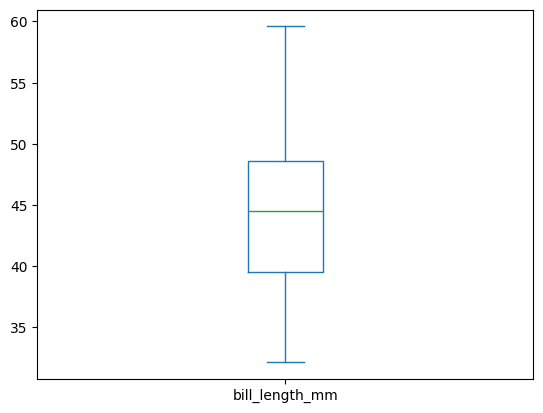

In [11]:
# Visualizing the distribution of 'bill_length_mm' using a box plot
panguins_data.bill_length_mm.plot.box()

<Figure size 1200x800 with 0 Axes>

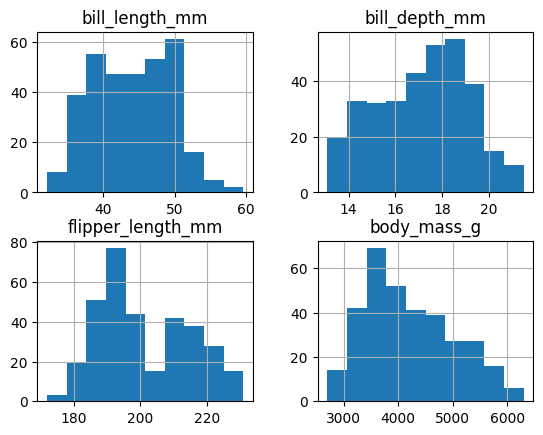

In [12]:
# Displaying histograms for all numerical variables in the dataset
plt.figure(figsize=(12, 8))
panguins_data.hist()
plt.show()

### Pie Charts for Categorical Variables

<Axes: title={'center': 'Sex Distribution'}, ylabel='sex'>

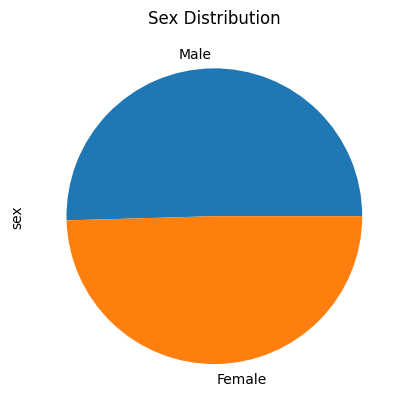

In [13]:
# Pie charts for categorical variables to show proportions
panguins_data.sex.value_counts().plot.pie(title="Sex Distribution")

<Axes: title={'center': 'Species Distribution'}, ylabel='species'>

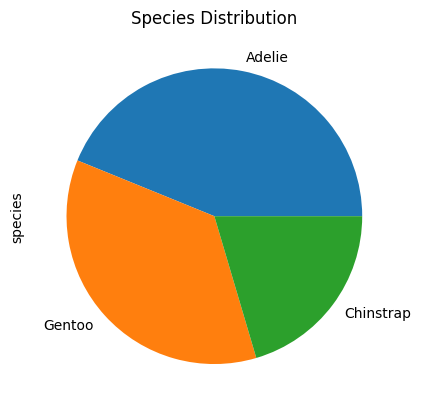

In [14]:
panguins_data.species.value_counts().plot.pie(title="Species Distribution")

<Axes: title={'center': 'Island Distribution'}, ylabel='island'>

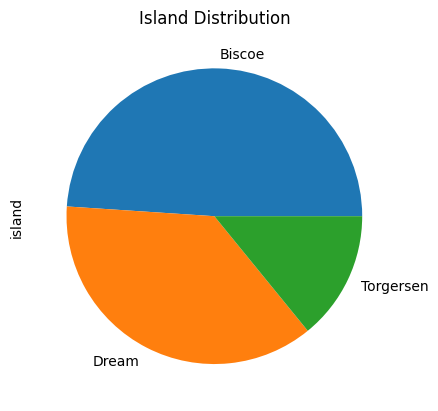

In [15]:
panguins_data.island.value_counts().plot.pie(title="Island Distribution")

# Hypothesis Testing

## Z-Test

In [16]:
# Loading another dataset related to heart disease
heart_df = pd.read_csv("datasets/heart.csv")
heart_df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [17]:
# Z-test for comparing the cholesterol levels of healthy and diseased individuals
from statsmodels.stats.weightstats import ztest

cholesterol_healthy = heart_df[heart_df.target == 0].chol
cholesterol_diseased = heart_df[heart_df.target == 1].chol

# Performing a two-sample z-test
z_stat, p_value = ztest(cholesterol_healthy, cholesterol_diseased, value=0, alternative="two-sided")
print("Z-statistic:", z_stat, "P-value:", p_value)

Z-statistic: 3.213433097179175 P-value: 0.0013115835020684594


-> We conculude that the test is significant and there's a diffrence between Cholesterol leveles of healthy and diseased individuals.

## T-Test

### Same Population (No Significance)

Proportion of significant results (p < 0.05): 0.052


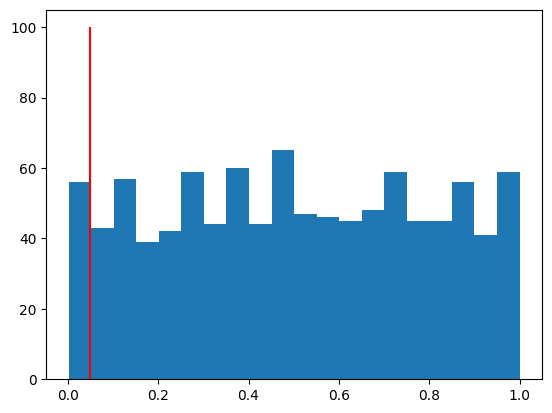

In [18]:
# Function to generate random samples from a given array
def random_sample(arr: np.array, size: int = 1) -> np.array:
    return arr[np.random.choice(len(arr), size=size, replace=False)]

# Simulating data from a standard normal distribution and performing a t-test
pop = np.random.normal(0, 1, size=100)
results = []

for trial in range(1000):
    pop_samples1 = [random_sample(pop, size=50) for _ in range(200)]
    pop_samples2 = [random_sample(pop, size=50) for _ in range(200)]

    pop_samples_means1 = [sample.mean() for sample in pop_samples1]
    pop_samples_means2 = [sample.mean() for sample in pop_samples2]

    result = stats.ttest_ind(pop_samples_means1, pop_samples_means2)
    results.append(result[1])

# Checking how many results have p-values less than 0.05
print("Proportion of significant results (p < 0.05):", sum(np.array(results) < 0.05) / 1000)

# Plotting the distribution of p-values
plt.hist(x=results, bins=int(1/0.05))
plt.vlines(0.05, 0, 100, colors="red")
plt.show()


### Different Populations (Significant Result)

1.0


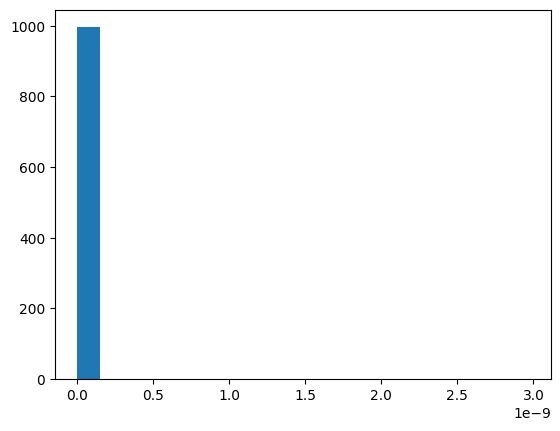

In [19]:
pop1 = np.random.normal(0, 1, size=100)
pop2 = np.random.normal(1, 1, size=100)


results = []

for trial in range(1000):
    pop1_samples = []
    pop2_samples = []

    pop1_samples = [random_sample(pop1, size=10) for _ in range(30)]
    pop2_samples = [random_sample(pop2, size=10) for _ in range(30)]
    
    
    pop1_samples_means = [sample.mean() for sample in pop1_samples]
    pop2_samples_means = [sample.mean() for sample in pop2_samples]


    result = stats.ttest_ind(pop1_samples_means, pop2_samples_means)
    results.append(result[1])
    


print(sum(np.array(results) < 0.05) / 1000)


plt.hist(x=results, bins=int(1/0.05))
plt.show()

We can see that for the different populations all the p values were way less than 0.05  even though the number of samples and their size were much smaller.

## ANOVA (Analysis of Variance)

In [20]:
# Splitting the heart dataset into age groups and testing cholesterol levels between groups
group1 = heart_df[(heart_df.age < 40) & (heart_df.age >= 30)]["chol"]
group2 = heart_df[(heart_df.age < 50) & (heart_df.age >= 40)]["chol"]
group3 = heart_df[(heart_df.age < 60) & (heart_df.age >= 50)]["chol"]
group4 = heart_df[(heart_df.age < 70) & (heart_df.age >= 60)]["chol"]
group5 = heart_df[heart_df.age >= 70]["chol"]

# Performing ANOVA (one-way analysis of variance) to test for differences between groups
f_stat, p_value = stats.f_oneway(group1, group2, group3, group4, group5)
print("ANOVA F-statistic:", f_stat, "P-value:", p_value)

ANOVA F-statistic: 12.745352556086022 P-value: 3.990015750271489e-10


-> We can see that the Cholesterol level differ from an age category to another.

#### A small comparison between ANOVA and T-Test for two groups

In [21]:
stats.f_oneway(group1, group2)

F_onewayResult(statistic=9.935248507041583, pvalue=0.0017924223271166676)

In [22]:
stats.ttest_ind(group1, group2)

TtestResult(statistic=-3.152022922987967, pvalue=0.001792422327116621, df=288.0)

-> They gave pretty much the same p-value, and that makes sense since ANOVA testing for two variables is just a T-test.

# Correlation and Linear Regression

## Correlation

In [23]:
# Correlation matrix to examine the relationships between numerical variables
corr_matrix = panguins_data.corr(numeric_only=True)
corr_matrix.style.background_gradient(cmap='Blues').format(precision=2)

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
bill_length_mm,1.00,-0.23,0.65,0.59
bill_depth_mm,-0.23,1.00,-0.58,-0.47
flipper_length_mm,0.65,-0.58,1.00,0.87
body_mass_g,0.59,-0.47,0.87,1.00


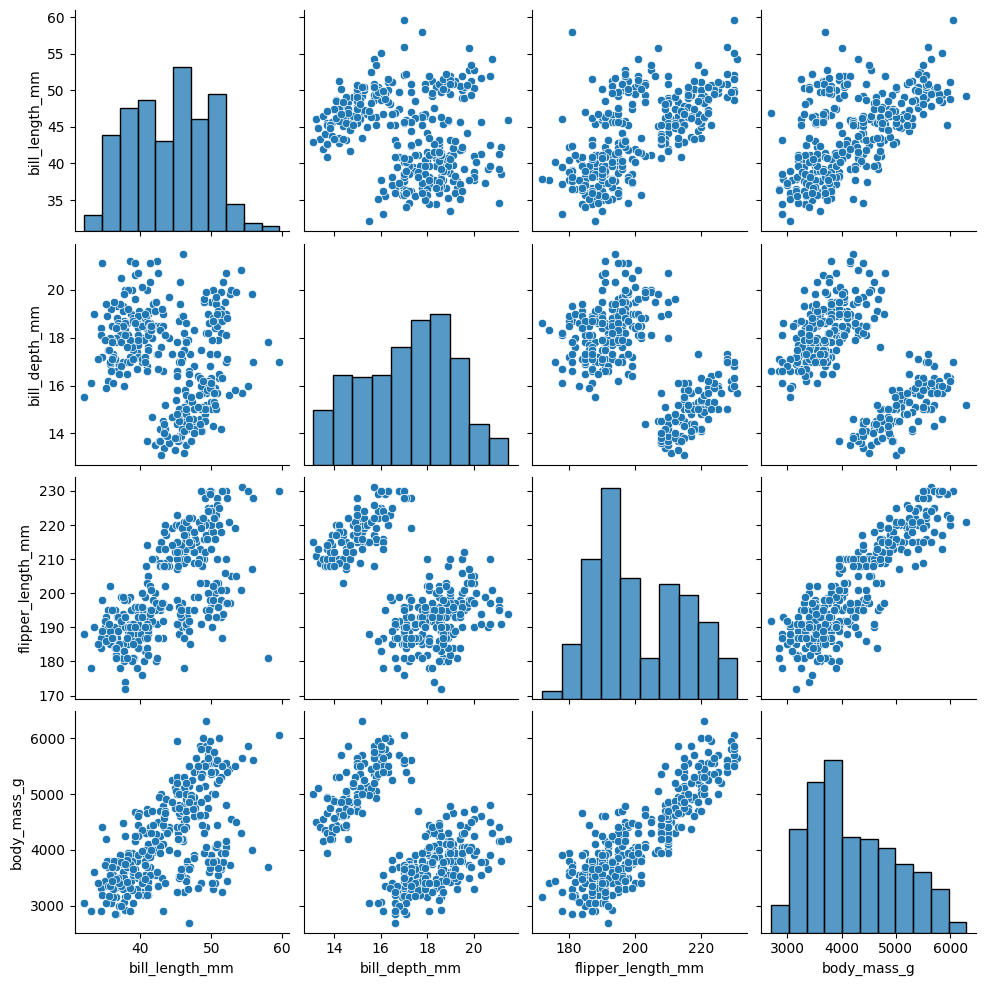

In [24]:
# Pairplot to visualize relationships between variables
sns.pairplot(panguins_data)
plt.show()

## Simple Linear Regression

In [25]:
# Simple linear regression between 'body_mass_g' and 'flipper_length_mm' (we chose these variables because they are highly correlated with a coefficent of .87)
X = sm.add_constant(panguins_data.body_mass_g)  # Adding intercept
y = panguins_data.flipper_length_mm

mod = sm.OLS(y, X)  # Ordinary least squares regression model
res = mod.fit()  # Fitting the model

# Printing the regression summary
res.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      flipper_length_mm   R-squared:                       0.762
Model:                            OLS   Adj. R-squared:                  0.761
Method:                 Least Squares   F-statistic:                     1060.
Date:                Wed, 16 Oct 2024   Prob (F-statistic):          3.13e-105
Time:                        23:04:33   Log-Likelihood:                -1112.1
No. Observations:                 333   AIC:                             2228.
Df Residuals:                     331   BIC:                             2236.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const         137.0396      1.999     68.562      0.000     133.108     140.972
body_mass_g     0.0152      0.000     32.562      0.000       0.014       0.016
==============================================================================
Omnibus:                       11.941   Durbin-Watson:                   1.641
Prob(Omnibus):                  0.003   Jarque-Bera (JB):               12.696
Skew:                          -0.474   Prob(JB):                      0.00175
Kurtosis:                       2.872   Cond. No.                     2.28e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.28e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

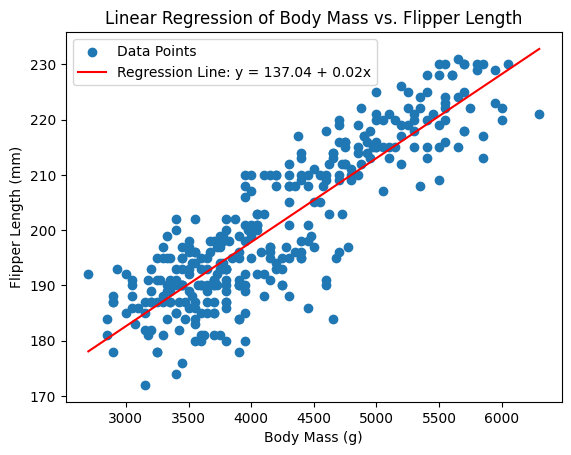

In [26]:
# Plotting the regression line
intercept = res.params[0]
slope = res.params[1]
x_vals = np.linspace(panguins_data.body_mass_g.min(), panguins_data.body_mass_g.max())
y_vals = intercept + slope * x_vals

plt.scatter(panguins_data.body_mass_g, panguins_data.flipper_length_mm, label='Data Points')
plt.plot(x_vals, y_vals, color='red', label=f'Regression Line: y = {intercept:.2f} + {slope:.2f}x')
plt.xlabel('Body Mass (g)')
plt.ylabel('Flipper Length (mm)')
plt.title('Linear Regression of Body Mass vs. Flipper Length')
plt.legend()
plt.show()

## Multiple Linear Regression

In [27]:
# Multiple linear regression with two independent variables: 'flipper_length_mm' and 'bill_length_mm'
X = sm.add_constant(panguins_data[["flipper_length_mm", "bill_length_mm"]])
y = panguins_data.body_mass_g

mod = sm.OLS(y, X)  # Ordinary least squares regression model
res = mod.fit()  # Fitting the model

# Printing the regression summary
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            body_mass_g   R-squared:                       0.763
Model:                            OLS   Adj. R-squared:                  0.761
Method:                 Least Squares   F-statistic:                     530.4
Date:                Wed, 16 Oct 2024   Prob (F-statistic):          8.15e-104
Time:                        23:04:33   Log-Likelihood:                -2460.6
No. Observations:                 333   AIC:                             4927.
Df Residuals:                     330   BIC:                             4939.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const             -5836.2987    312.604    -18.670      0.000   -6451.246   -5221.352
flipper_length_mm    48.8897      2.034     24.034      0.000      44.888      52.891
bill_length_mm        4.9586      5.214      0.951      0.342      -5.297      15.214
==============================================================================
Omnibus:                        5.790   Durbin-Watson:                   2.041
Prob(Omnibus):                  0.055   Jarque-Bera (JB):                5.729
Skew:                           0.321   Prob(JB):                       0.0570
Kurtosis:                       3.031   Cond. No.                     2.99e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.99e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

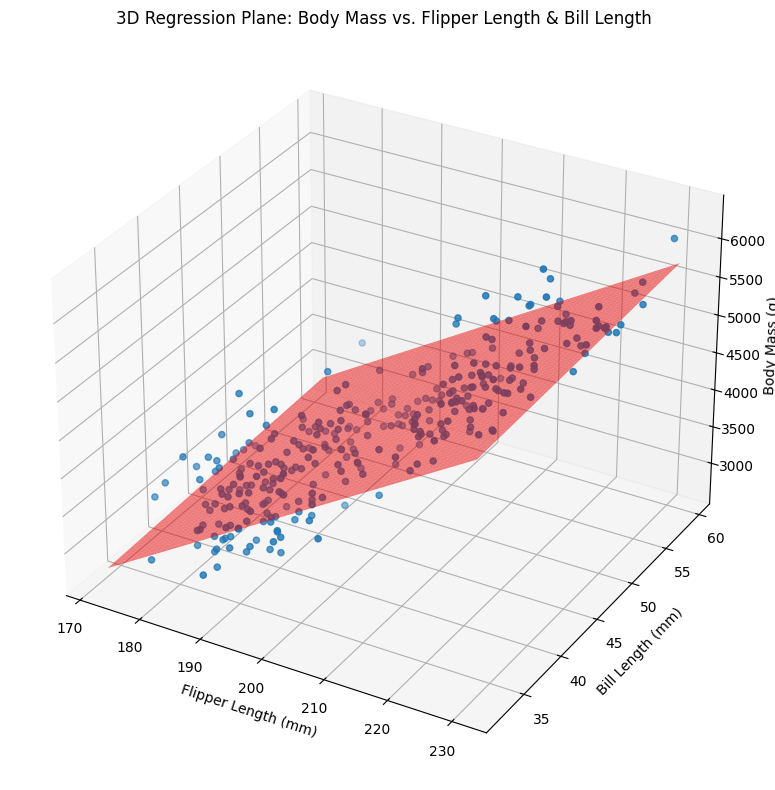

In [28]:
# Visualizing the regression plane in 3D
intercept = res.params[0]
coef_flipper = res.params[1]
coef_bill = res.params[2]

x1_vals = np.linspace(panguins_data.flipper_length_mm.min(), panguins_data.flipper_length_mm.max(), 100)
x2_vals = np.linspace(panguins_data.bill_length_mm.min(), panguins_data.bill_length_mm.max(), 100)
x1_vals, x2_vals = np.meshgrid(x1_vals, x2_vals)

y_vals = intercept + coef_flipper * x1_vals + coef_bill * x2_vals

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection="3d")

ax.scatter(panguins_data.flipper_length_mm, panguins_data.bill_length_mm, panguins_data.body_mass_g, label="Data points")
ax.plot_surface(x1_vals, x2_vals, y_vals, color="red", alpha=0.5)

ax.set_xlabel('Flipper Length (mm)')
ax.set_ylabel('Bill Length (mm)')
ax.set_zlabel('Body Mass (g)')
plt.title('3D Regression Plane: Body Mass vs. Flipper Length & Bill Length')

plt.tight_layout()
plt.show()